# HW2Q6

### import libraries

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

### constants

In [3]:
EPSILON = 0.01
MAX_ITER = 10000
_ = np.seterr('ignore')

### functions

In [4]:
def plot_function():
    """
    Plot the function:
    
    .. math:: f(x_1, x_2) = (-2x_1^2 -3x_1x_2 + 2x_2^2)sin(x_1)
    """
    x1 = np.linspace(-6, 6, 50)
    x2 = np.linspace(-6, 6, 50)
    X1, X2 = np.meshgrid(x1, x2)
    Y = f(X1, X2)
    ax = plt.axes(projection='3d')
    ax.plot_surface(X1, X2, Y, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    plt.show()


def gradient_descent(x1_0, x2_0, max_iter, rho):
    """
    This function runs gradient descent.
    :param x1_0: initial x1
    :param x2_0: initial x2
    :param max_iter: max number of iteration
    :param rho: learning rate
    :return:
    """
    point_list = [np.array([x1_0, x2_0, f(x1_0, x2_0)])]
    curr_point = np.array([x1_0, x2_0, 0])
    for i in range(0, max_iter):
        curr_point, new_dir = single_descent(curr_point, rho)
        if np.linalg.norm(new_dir) < EPSILON:
            print("The total number of iterations is: {}".format(i + 1))
            return point_list
        elif np.abs(curr_point[0]) > 6 or np.abs(curr_point[1]) > 6:
            print("Out of range! (x1, x2) = ({}, {}), iteration number: {}".format(curr_point[0], curr_point[1], i + 1))
            return point_list
        elif np.any(np.isinf(curr_point)):
            print("It reaches infinite, does not converge!\n"
                  "The total number of iterations is: {}".format(i + 1))
            return point_list
        point_list += [curr_point]
    print("Exceeds max iteration: {}; with learning rate: {}".format(max_iter, rho))
    return point_list


def single_descent(point, rho):
    """
    perform a single descent from (t-1) to (t)
    :param point: point (t-1)
    :param rho: learning rate
    :return: an array of the (t) point and the dJ/dtheta
    """
    x1 = point[0]
    x2 = point[1]
    dx1 = np.sin(x1) * (-4. * x1 - 3. * x2) + np.cos(x1) * (-2. * np.power(x1, 2) - 3. * x1 * x2 + 2. * np.power(x2, 2))
    dx2 = np.sin(x1) * (4. * x2 - 3. * x1)
    new_x1 = x1 - dx1 * rho
    new_x2 = x2 - dx2 * rho
    new_y = f(new_x1, new_x2)
    return np.array([new_x1, new_x2, new_y]), np.array([dx1, dx2])


def f(x1, x2):
    """
    calculate the given function from given 2 inputs
    :param x1: input x1
    :param x2: input x2
    :return: out put f(x1,x2)
    """
    return np.sin(x1) * (-2. * np.power(x1, 2) - 3. * x1 * x2 + 2. * np.power(x2, 2))


def plot_learning_points(points):
    """
    Plot the points sequence generated by gradient descent
    :param points: Input points generated from gradient descent
    """
    df = pd.DataFrame(points, columns=['x1', 'x2', 'y'])
    df = df.replace([np.inf, -np.inf], np.nan).dropna()
    xs = df['x1'].values.tolist()
    ys = df['x2'].values.tolist()
    zs = df['y'].values.tolist()
    ax = plt.axes(projection='3d')
    ax.scatter3D(xs, ys, zs, c=zs)
    ax.plot3D(xs, ys, zs, 'gray')
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    ax.set_zlabel('y')
    plt.show()

### problem 1: run GD

The total number of iterations is: 1035
last five point here: [array([ -5.08707025,  -3.81801761, -75.25923664]), array([ -5.08706994,  -3.81800751, -75.25923674]), array([ -5.08706963,  -3.81799744, -75.25923685]), array([ -5.08706932,  -3.81798741, -75.25923695]), array([ -5.08706902,  -3.81797741, -75.25923705])]


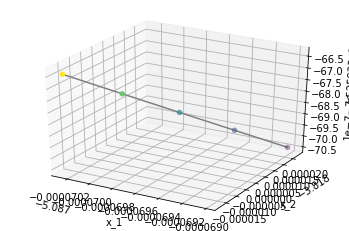

Out of range! (x1, x2) = (4.690925293816978, -6.003041432148811), iteration number: 104
last five point here: [array([   4.68178919,   -5.81502793, -105.41563231]), array([   4.68373442,   -5.85231595, -106.81268248]), array([   4.68561842,   -5.88976104, -108.22125791]), array([   4.68744345,   -5.92736346, -109.6414433 ]), array([   4.6892117 ,   -5.96512349, -111.07332413])]


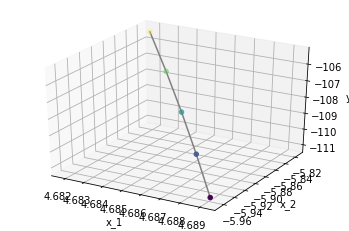

Out of range! (x1, x2) = (-1.1080098493551345, -6.001436451786327), iteration number: 111
last five point here: [array([ -1.09725251,  -5.91009732, -42.71438274]), array([ -1.09945549,  -5.92820674, -43.04787303]), array([ -1.10163133,  -5.94639521, -43.3841202 ]), array([ -1.10378146,  -5.96466288, -43.72314969]), array([ -1.10590721,  -5.9830099 , -44.06498683])]


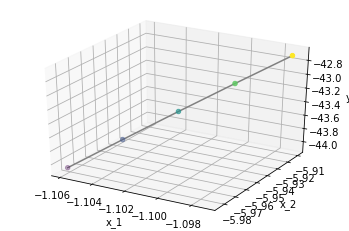

The total number of iterations is: 1574
last five point here: [array([ -5.08689987,  -3.81245419, -75.25923658]), array([ -5.08690018,  -3.81246432, -75.25923668]), array([ -5.08690049,  -3.81247441, -75.25923679]), array([ -5.0869008 ,  -3.81248447, -75.25923689]), array([ -5.0869011 ,  -3.81249449, -75.25923699])]


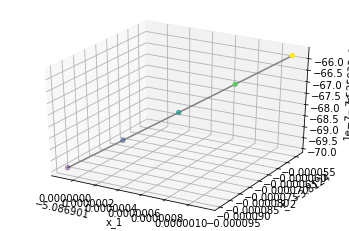

The total number of iterations is: 1671
last five point here: [array([ -5.08707051,  -3.81802596, -75.25923656]), array([ -5.0870702 ,  -3.81801583, -75.25923666]), array([ -5.08706989,  -3.81800573, -75.25923676]), array([ -5.08706958,  -3.81799566, -75.25923686]), array([ -5.08706927,  -3.81798564, -75.25923696])]


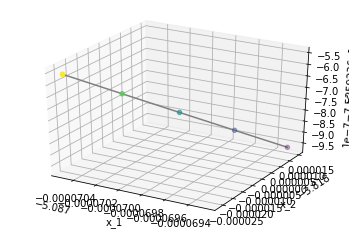

In [13]:
rho = 0.001

# point 1: (-3,-4)
point_result = gradient_descent(-3, -4, MAX_ITER, rho)
last_five_points = point_result[len(point_result) - 5: len(point_result)]
print("last five point here: {}".format(last_five_points))
plot_learning_points(last_five_points)

# point 2: (4,-3)
point_result = gradient_descent(4, -3, MAX_ITER, rho)
last_five_points = point_result[len(point_result) - 5: len(point_result)]
print("last five point here: {}".format(last_five_points))
plot_learning_points(last_five_points)

# point 3: (1,5)
point_result = gradient_descent(1, -5, MAX_ITER, rho)
last_five_points = point_result[len(point_result) - 5: len(point_result)]
print("last five point here: {}".format(last_five_points))
plot_learning_points(last_five_points)

# point 4: (-4,-3)
point_result = gradient_descent(-4, -3, MAX_ITER, rho)
last_five_points = point_result[len(point_result) - 5: len(point_result)]
print("last five point here: {}".format(last_five_points))
plot_learning_points(last_five_points)

# point 5: (-5,-5)
point_result = gradient_descent(-5, -5, MAX_ITER, rho)
last_five_points = point_result[len(point_result) - 5: len(point_result)]
print("last five point here: {}".format(last_five_points))
plot_learning_points(last_five_points)

### problem 2 print the final 5 result of GDs